In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Temp_pred=pd.read_csv("temperature_prediction.csv")
Temp_pred

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
Temp_pred.shape

(7752, 25)

Here we have 7752 rows and 25 columns in the dataset.

In [4]:
Temp_pred.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [5]:
Temp_pred.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
Temp_pred.sample(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5991,17.0,22-08-2016,33.0,22.3,43.268196,84.076523,32.357653,23.471674,4.746359,141.146059,...,0.000000,0.000000,0.000000,37.6181,127.099,53.4712,0.6970,4728.781738,32.7,22.7
6777,3.0,23-07-2017,28.4,25.8,60.465553,86.768524,31.907950,26.792634,5.212544,8.028220,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5591.194824,27.8,24.9
863,14.0,03-08-2013,31.9,26.3,55.529461,90.411636,32.367705,26.274704,6.636976,24.247013,...,0.000303,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5339.776367,32.2,26.1
5487,13.0,02-08-2016,31.4,25.5,49.045334,93.935677,33.183318,23.916167,5.040808,80.144165,...,0.000000,0.456072,0.458922,37.5776,127.083,59.8324,2.6865,5336.178223,34.6,24.8
4122,23.0,09-08-2015,31.3,24.7,55.568428,90.015915,30.124239,24.292189,5.697779,73.004598,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,5171.602051,33.1,24.8
1635,11.0,03-07-2014,25.0,22.2,40.054073,81.543877,31.245301,21.357775,5.914385,57.553638,...,0.000000,0.001426,0.068309,37.5372,127.085,28.7000,0.6233,5846.328613,32.4,22.5
5872,23.0,17-08-2016,34.5,27.3,48.197029,76.168182,33.482669,26.887777,5.620852,92.903245,...,0.000000,0.001654,0.000000,37.5372,126.891,15.5876,0.1554,4887.750000,35.7,27.5
1966,17.0,16-07-2014,29.5,21.7,51.461197,92.598518,30.155588,22.209463,7.238759,96.750112,...,0.000000,0.000000,0.000000,37.6181,127.099,53.4712,0.6970,5715.198730,28.5,21.8
7722,23.0,29-08-2017,23.7,18.4,46.162144,76.678185,22.552933,15.703791,4.152942,47.538868,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,4482.970215,23.8,17.0
6304,5.0,04-07-2017,31.5,23.5,41.341400,91.866837,32.187685,23.187345,4.778763,150.516826,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5834.413086,33.1,23.0


In [7]:
Temp_pred.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

## DataFrame Description

This data is for the weather prediction of the next day minimum and maximum air temperatures.Various factors play a major role in the prediction of the data are given in the form of features.
Column one is station, its value ranges from 1 to 25 for different weather stations.Date column is present in the form of yyyy-mm-dd(2013-06-30 to 2017-08-30). Present_Tmax column depicts the Maximum air temperature between 0 and 21 h on the present day its value ranges from (20 to 37.6 degree centigrade).
Present_Tmin column depicts the Minimum air temperature between 0 and 21 h on the present day with range of values from 11.3 to 29.9 in degree centigrade. LDAPS columns denotes the LDAPS model. LDAPS_RHmin column depicts forecast of next-day minimum relative humidity in percentage: 19.8 to 98.5.LDAPS_RHmax column forecast next-day maximum relative humidity in percentage from 58.9 to 100.LDAPS_Tmax_lapse column forecast next-day maximum air temperature applied lapse rate in degree centigrade from 17.6 to 38.5.LDAPS_Tmin_lapse column forecast next-day minimum air temperature applied lapse rate in degree centigrade from 14.3 to 29.6.LDAPS_WS column forecast next-day average wind speed in (m/s) ranges from 2.9 to 21.9. LDAPS_LH forecast next-day average latent heat flux in (W/m2) ranges from -13.6 to 213.4. LDAPS_CC1 forecast next-day 1st 6-hour split average cloud cover (0-5 h) in percentage from 0 to 0.97. LDAPS_CC2 forecast next-day 2nd 6-hour split average cloud cover (6-11 h) in percentage ranges from 0 to 0.97. LDAPS_CC3 forecast next-day 3rd 6-hour split average cloud cover (12-17 h)in percentage ranges from 0 to 0.98.
LDAPS_CC4 forecast  next-day 4th 6-hour split average cloud cover (18-23 h) in percentage ranges from: 0 to 0.97. LDAPS_PPT1 forecast next-day 1st 6-hour split average precipitation (0-5 h) in percentage ranges from: 0 to 23.7. LDAPS_PPT2 forecast next-day 2nd 6-hour split average precipitation (6-11 h) in percentage from: 0 to 21.6. LDAPS_PPT3 forecast next-day 3rd 6-hour split average precipitation (12-17 h) in percentage ranges from: 0 to 15.8. LDAPS_PPT4  forecast next-day 4th 6-hour split average precipitation (18-23 h) in percenatge ranges from: 0 to 16.7. lat - depicts Latitude ranges from :37.456 to 37.645. lon depicts Longitude whcih ranges from: 126.826 to 127.135. DEM -depicts Elevation in meter (m): 12.4 to 212.3. Slope depicts Slope ranges from: 0.1 to 5.2. Solar radiation depicts Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9 Next_Tmax depicts The next-day maximum air temperature in degree centigrade ranges from: 17.4 to 38.9 Next_Tmin depicts the next-day minimum air temperature in degree centigrade which ranges from: 11.3 to 29.8.

### Checking the Datatypes of the columns

In [8]:
Temp_pred.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [9]:
Temp_pred.loc[Temp_pred["Next_Tmax"]== " "] #for checking empty value

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [10]:
Temp_pred.loc[Temp_pred["Next_Tmin"]== " "] #for checking empty value

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [11]:
Temp_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [12]:
# converting object to datetime datatype
Temp_pred['Date']=pd.to_datetime(Temp_pred['Date'])

In [13]:
# adding new column day,month,year in dataframe 
Temp_pred['Date_date']=Temp_pred['Date'].dt.day
Temp_pred['Date_month']=Temp_pred['Date'].dt.month
Temp_pred['Date_year']=Temp_pred['Date'].dt.year
Temp_pred

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_date,Date_month,Date_year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,2017.0
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,2017.0
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [14]:
Temp_pred=Temp_pred.drop('Date',axis=1)

In [15]:
Temp_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


## Using Simple Imputer for Imputing Data


In [16]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")

In [17]:
for i in Temp_pred.columns:
    if Temp_pred[i].dtypes=="float64":
        Temp_pred[i]=imp.fit_transform(Temp_pred[i].values.reshape(-1,1))

In [18]:
Temp_pred

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_date,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.000000,6.000000,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.000000,6.000000,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.000000,6.000000,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.000000,6.000000,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.000000,6.000000,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.000000,8.000000,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.000000,8.000000,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.000000,8.000000,2017.0
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,16.370968,7.080645,2015.0


In [19]:
convert_dict = {'Date_date': int,'Date_month': int,'Date_year':int}
Temp_pred = Temp_pred.astype(convert_dict)

In [20]:
Temp_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


In [21]:
Temp_pred.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Date_date           0
Date_month          0
Date_year           0
dtype: int64

### Univariate Analysis

### Making DataFrame for Nominal Data


In [22]:
Temp_pred_nominal=Temp_pred[['Date_date','Date_month','Date_year']].copy()
Temp_pred_nominal

,Date_date,Date_month,Date_year
0,30,6,2013
1,30,6,2013
2,30,6,2013
3,30,6,2013
4,30,6,2013
...,...,...,...
7747,30,8,2017
7748,30,8,2017
7749,30,8,2017
7750,16,7,2015


In [23]:
Temp_pred_nominal.columns

Index(['Date_date', 'Date_month', 'Date_year'], dtype='object')

### Vizualization of the data :


8     1500
7     1500
30     375
16     252
25     250
20     250
24     250
28     250
13     250
17     250
21     250
14     250
29     250
27     250
18     250
22     250
26     250
15     250
19     250
23     250
31     125
Name: Date_date, dtype: int64


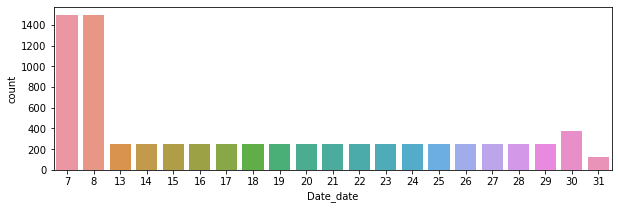

In [24]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Date_date", data=Temp_pred_nominal)
print(Temp_pred_nominal["Date_date"].value_counts())

7     2627
8     2500
6      375
11     250
3      250
10     250
2      250
9      250
5      250
1      250
12     250
4      250
Name: Date_month, dtype: int64


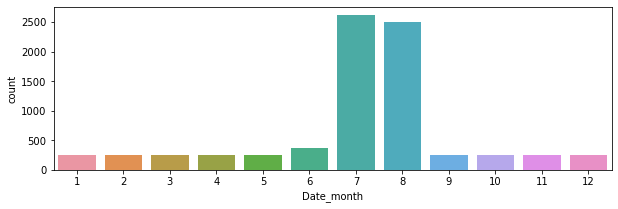

In [25]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Date_month", data=Temp_pred_nominal)
print(Temp_pred_nominal["Date_month"].value_counts())

2015    1552
2014    1550
2017    1550
2013    1550
2016    1550
Name: Date_year, dtype: int64


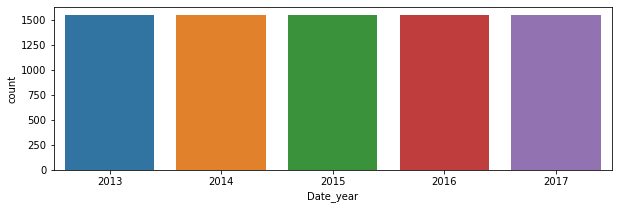

In [26]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Date_year", data=Temp_pred_nominal)
print(Temp_pred_nominal["Date_year"].value_counts())

### Checking the distribution of the continuous data and ordinal data


In [27]:
Temp_pred_continuous=Temp_pred[["station","Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","lat","lon","DEM","Slope","Solar radiation","Next_Tmax","Next_Tmin"]].copy()
Temp_pred_continuous

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [28]:
Temp_pred_continuous.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='station', ylabel='Density'>

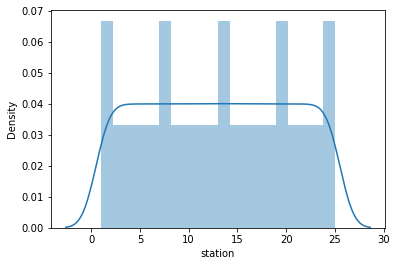

In [29]:
sns.distplot(Temp_pred_continuous['station'],kde=True)

The data is looking uniform from the distribution with minimum and maximum value 1 and 25 respectively.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

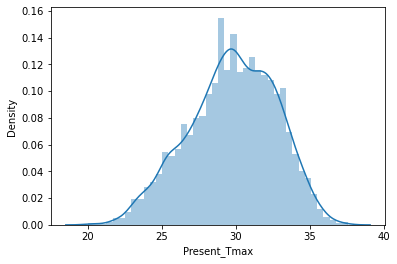

In [30]:
sns.distplot(Temp_pred_continuous['Present_Tmax'],kde=True)

The data is looking negatively skewed from the plot with minimum and maximum value 18 and 38 respectively.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

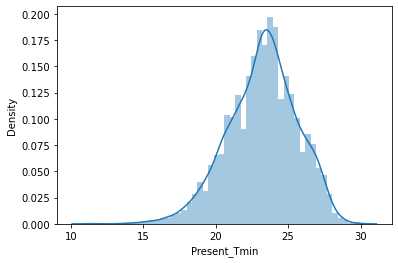

In [31]:
sns.distplot(Temp_pred_continuous['Present_Tmin'],kde=True)

The data is looking normally distributed from the plot with minimum and maximum value 10 and 30 respectively.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

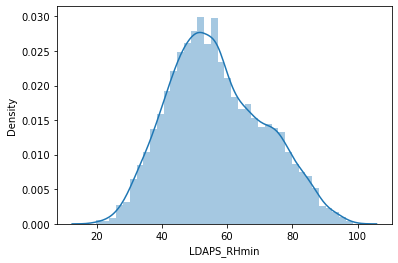

In [32]:
sns.distplot(Temp_pred_continuous['LDAPS_RHmin'],kde=True)

The data is looking positively skewed from the plot with minimum and maximum value 18 and 100 respectively.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

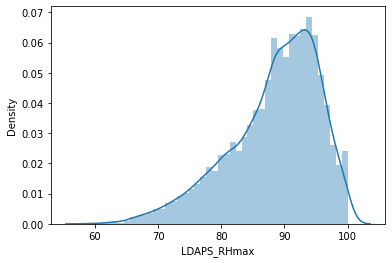

In [33]:
sns.distplot(Temp_pred_continuous['LDAPS_RHmax'],kde=True)

The data is looking negatively skewed from the plot with minimum and maximum value 55 and 100 respectively.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

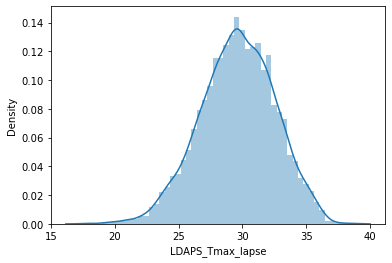

In [34]:
sns.distplot(Temp_pred_continuous['LDAPS_Tmax_lapse'],kde=True)

The data is looking normally distributed from the plot with minimum and maximum value 16 and 40 respectively.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

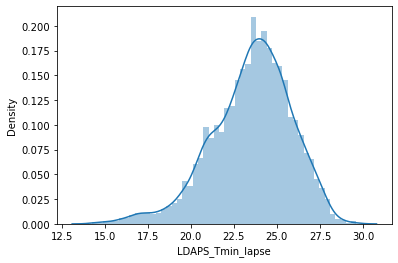

In [35]:
sns.distplot(Temp_pred_continuous['LDAPS_Tmin_lapse'],kde=True)

The data is looking a bit negatively skewed from the plot with minimum and maximum value 13 and 30 respectively.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

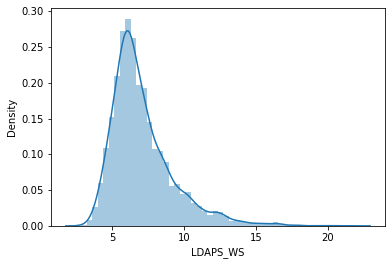

In [36]:
sns.distplot(Temp_pred_continuous['LDAPS_WS'],kde=True)

The data is looking positively skewed from the plot with minimum and maximum value 2.5 and 24 respectively.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

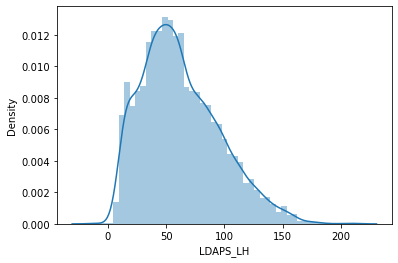

In [37]:
sns.distplot(Temp_pred_continuous['LDAPS_LH'],kde=True)

The data is looking positively skewed with minimum and maximum value 0 and 200 respectively.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

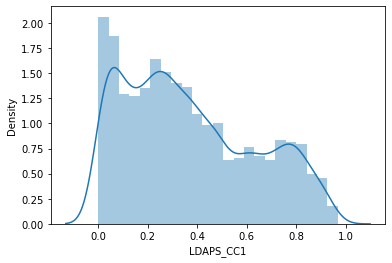

In [38]:
sns.distplot(Temp_pred_continuous['LDAPS_CC1'],kde=True)

The data is non-uniform with some positive skewness with minimum and maximum value 0 and 1.0 respectively.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

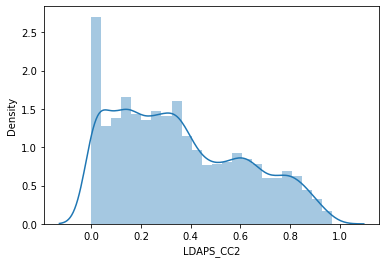

In [39]:
sns.distplot(Temp_pred_continuous['LDAPS_CC2'],kde=True)

The data is non uniform with positive skewness with minimum and maximum value 0 and 1.0 repectively.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

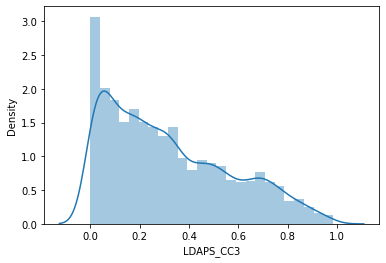

In [40]:
sns.distplot(Temp_pred_continuous['LDAPS_CC3'],kde=True)

The data is positively skewed from the plot distribution with minimum and maximum value 0 and 1.0 respectively.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

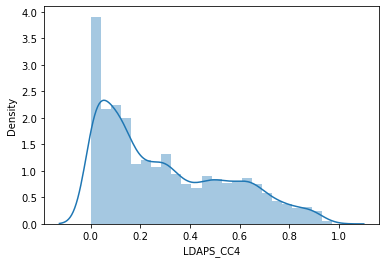

In [41]:
sns.distplot(Temp_pred_continuous['LDAPS_CC4'],kde=True)

The data is positively skewed from the plot distribution with minimum and maximum value 0 and 1.0 respectively.

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

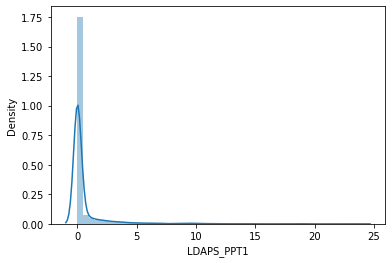

In [42]:
sns.distplot(Temp_pred_continuous['LDAPS_PPT1'],kde=True)

The data is looking positively skewed with maximum and minimum value 24 and 0 respectively.

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

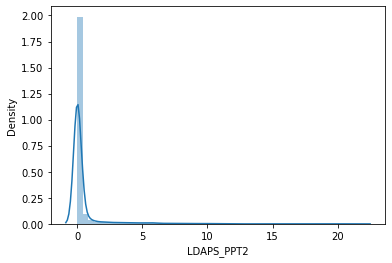

In [43]:
sns.distplot(Temp_pred_continuous['LDAPS_PPT2'],kde=True)

The data is looking positively skewed with maximum and minimum value 24 and 0 respectively.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

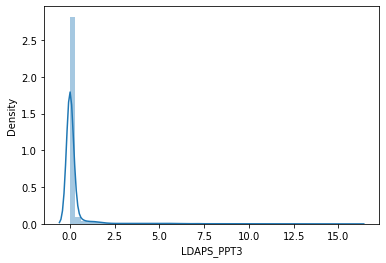

In [44]:
sns.distplot(Temp_pred_continuous['LDAPS_PPT3'],kde=True)

The data is looking positively skewed with minimum and maximum value 0 and 16 respectively.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

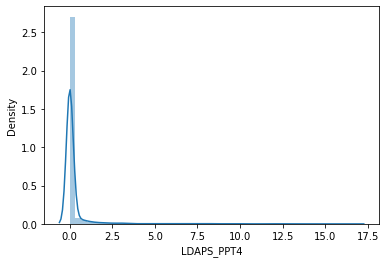

In [45]:
sns.distplot(Temp_pred_continuous['LDAPS_PPT4'],kde=True)

The data is looking positively skewed with minimum and maximum value 0 and 17.5 respectively.

<AxesSubplot:xlabel='lat', ylabel='Density'>

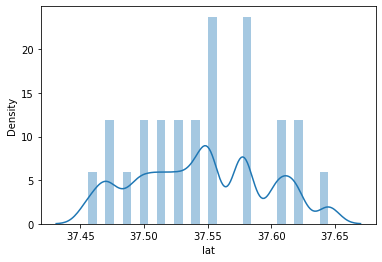

In [46]:
sns.distplot(Temp_pred_continuous['lat'],kde=True)

The data is looking non-uniform.

<AxesSubplot:xlabel='lon', ylabel='Density'>

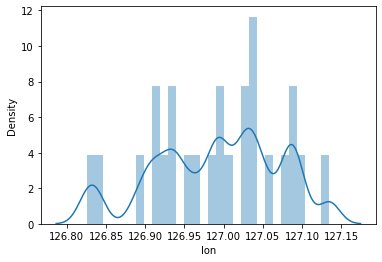

In [47]:
sns.distplot(Temp_pred_continuous['lon'],kde=True)

The data is looking non-uniform.

<AxesSubplot:xlabel='DEM', ylabel='Density'>

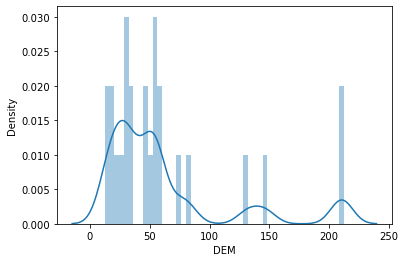

In [48]:
sns.distplot(Temp_pred_continuous['DEM'],kde=True)

The data is looking non-uniform with several peaks.

<AxesSubplot:xlabel='Slope', ylabel='Density'>

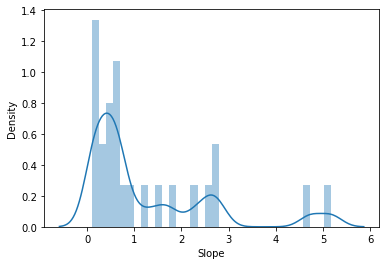

In [49]:
sns.distplot(Temp_pred_continuous['Slope'],kde=True)

The data is having several peaks and plot is non-uniform.

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

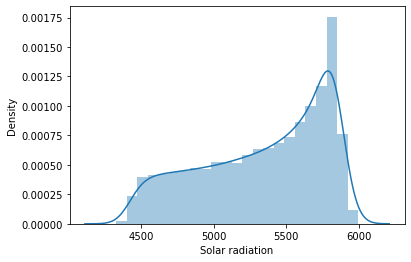

In [50]:
sns.distplot(Temp_pred_continuous['Solar radiation'],kde=True)

The plot is negatively skewed with minimum value 4200 and maximum value 6200.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

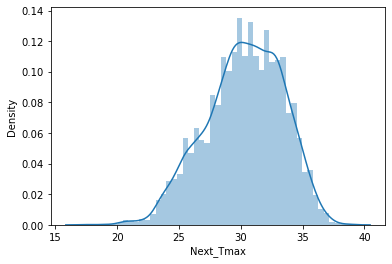

In [51]:
sns.distplot(Temp_pred_continuous['Next_Tmax'],kde=True)

The plot is looking negatively skewed with minimum value of 16 and maximum value of 40.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

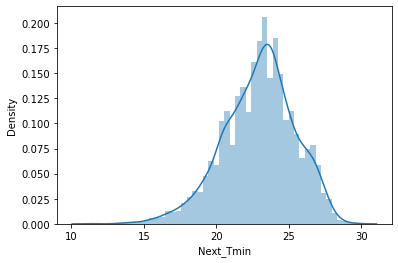

In [52]:
sns.distplot(Temp_pred_continuous['Next_Tmin'],kde=True)

The data is looking normally distributed with minimum value 10 and maximum value 32.

### Outliers Check

<AxesSubplot:>

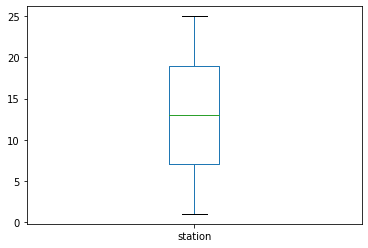

In [53]:
Temp_pred['station'].plot.box()

<AxesSubplot:>

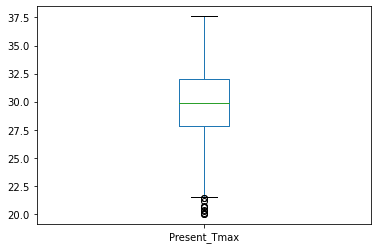

In [54]:
Temp_pred['Present_Tmax'].plot.box()

<AxesSubplot:>

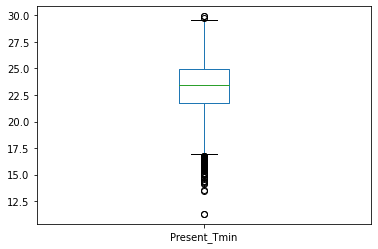

In [55]:
Temp_pred['Present_Tmin'].plot.box()

<AxesSubplot:>

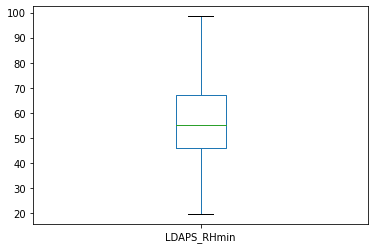

In [56]:
Temp_pred['LDAPS_RHmin'].plot.box()

<AxesSubplot:>

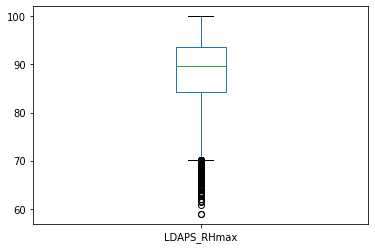

In [57]:
Temp_pred['LDAPS_RHmax'].plot.box()

<AxesSubplot:>

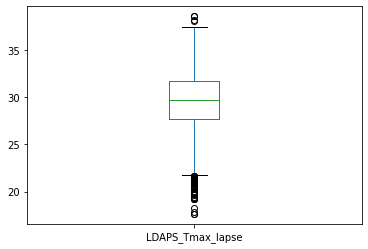

In [58]:
Temp_pred['LDAPS_Tmax_lapse'].plot.box()

<AxesSubplot:>

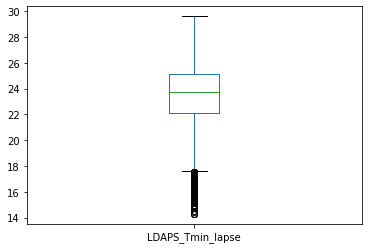

In [59]:
Temp_pred['LDAPS_Tmin_lapse'].plot.box()

<AxesSubplot:>

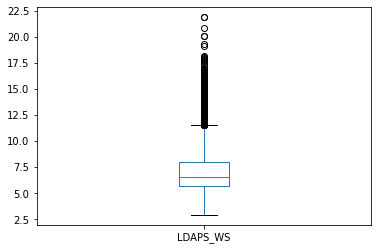

In [60]:
Temp_pred['LDAPS_WS'].plot.box()

<AxesSubplot:>

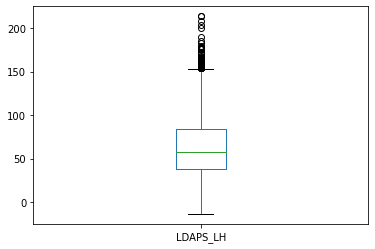

In [61]:
Temp_pred['LDAPS_LH'].plot.box()

<AxesSubplot:>

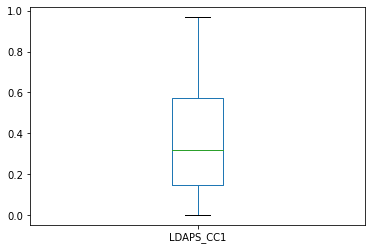

In [62]:
Temp_pred['LDAPS_CC1'].plot.box()

<AxesSubplot:>

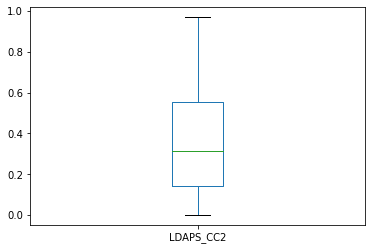

In [63]:
Temp_pred['LDAPS_CC2'].plot.box()

<AxesSubplot:>

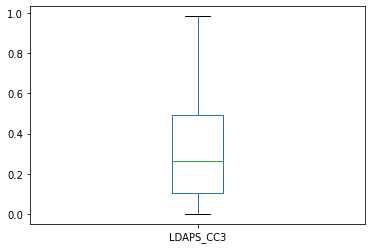

In [64]:
Temp_pred['LDAPS_CC3'].plot.box()

<AxesSubplot:>

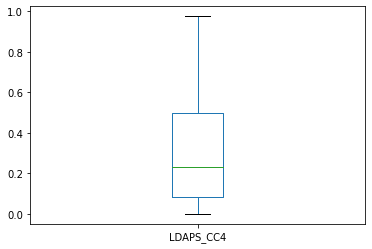

In [65]:
Temp_pred['LDAPS_CC4'].plot.box()

<AxesSubplot:>

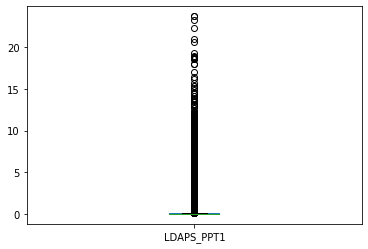

In [66]:
Temp_pred['LDAPS_PPT1'].plot.box()

<AxesSubplot:>

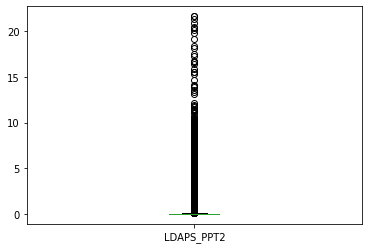

In [67]:
Temp_pred['LDAPS_PPT2'].plot.box()

<AxesSubplot:>

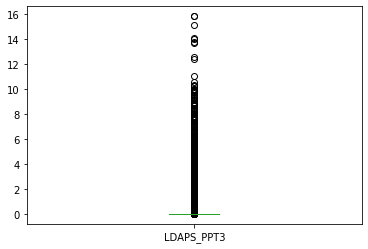

In [68]:
Temp_pred['LDAPS_PPT3'].plot.box()

<AxesSubplot:>

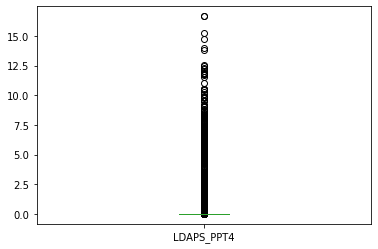

In [69]:
Temp_pred['LDAPS_PPT4'].plot.box()

<AxesSubplot:>

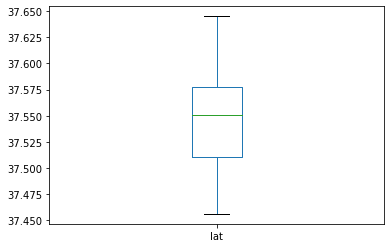

In [70]:
Temp_pred['lat'].plot.box()

<AxesSubplot:>

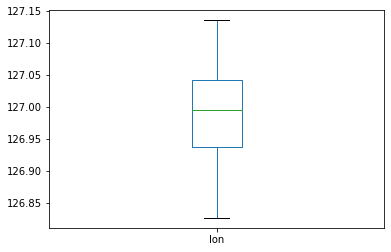

In [71]:
Temp_pred['lon'].plot.box()

<AxesSubplot:>

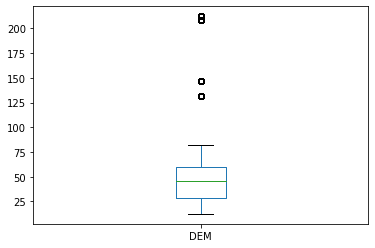

In [72]:
Temp_pred['DEM'].plot.box()

<AxesSubplot:>

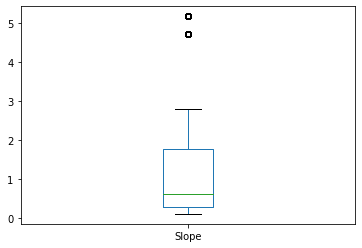

In [73]:
Temp_pred['Slope'].plot.box()

<AxesSubplot:>

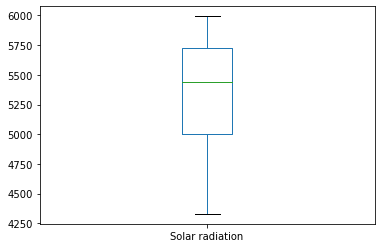

In [74]:
Temp_pred['Solar radiation'].plot.box()

<AxesSubplot:>

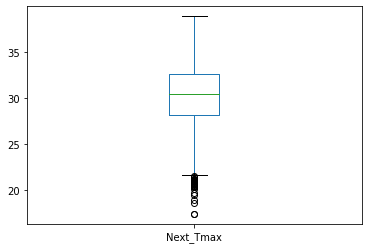

In [75]:
Temp_pred['Next_Tmax'].plot.box()

<AxesSubplot:>

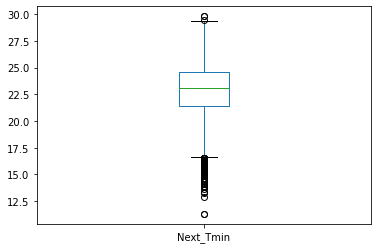

In [76]:
Temp_pred['Next_Tmin'].plot.box()

<AxesSubplot:>

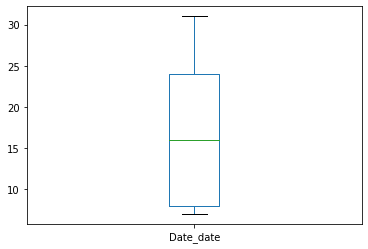

In [77]:
Temp_pred['Date_date'].plot.box()

<AxesSubplot:>

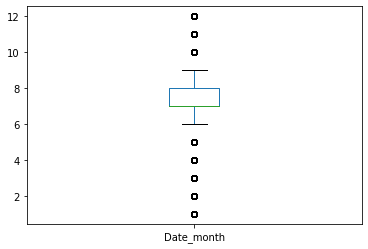

In [78]:
Temp_pred['Date_month'].plot.box()

<AxesSubplot:>

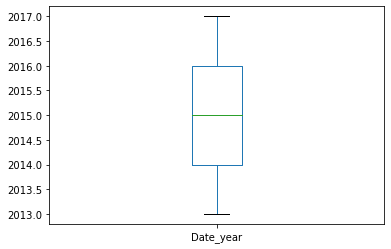

In [79]:
Temp_pred['Date_year'].plot.box()

From the above boxplots we can say that outliers are present in Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,
LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin,Date_month.

### Bivariate Analysis 

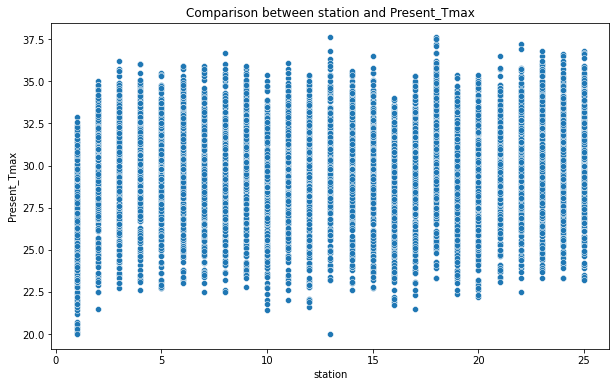

In [80]:
plt.figure(figsize=[10,6])
plt.title('Comparison between station and Present_Tmax')
sns.scatterplot(Temp_pred['station'], Temp_pred['Present_Tmax']);

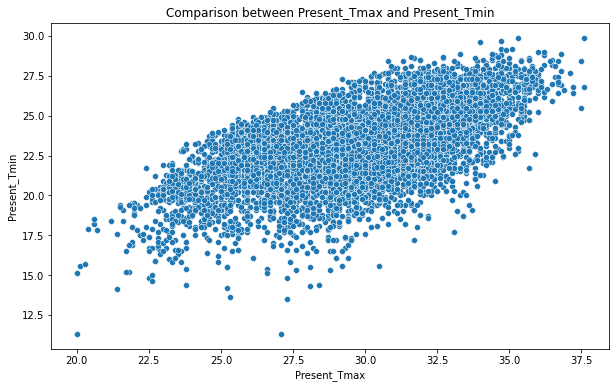

In [81]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Present_Tmax and Present_Tmin')
sns.scatterplot(Temp_pred['Present_Tmax'], Temp_pred['Present_Tmin']);

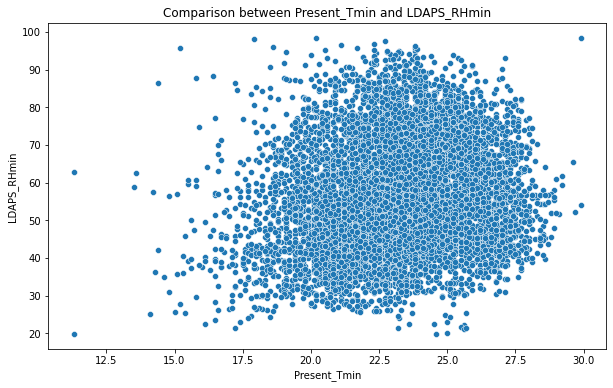

In [82]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Present_Tmin and LDAPS_RHmin')
sns.scatterplot(Temp_pred['Present_Tmin'], Temp_pred['LDAPS_RHmin']);

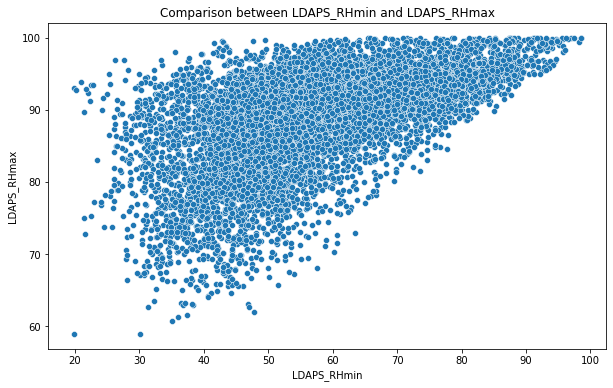

In [83]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_RHmin and LDAPS_RHmax')
sns.scatterplot(Temp_pred['LDAPS_RHmin'], Temp_pred['LDAPS_RHmax']);

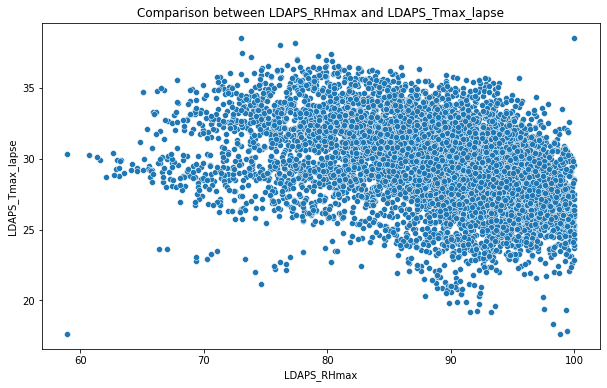

In [84]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_RHmax and LDAPS_Tmax_lapse')
sns.scatterplot(Temp_pred['LDAPS_RHmax'], Temp_pred['LDAPS_Tmax_lapse']);

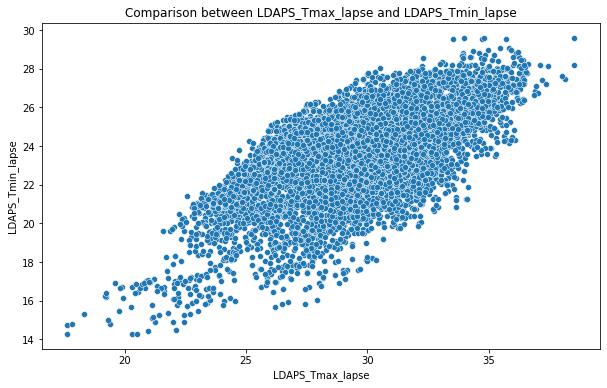

In [85]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_Tmax_lapse and LDAPS_Tmin_lapse')
sns.scatterplot(Temp_pred['LDAPS_Tmax_lapse'], Temp_pred['LDAPS_Tmin_lapse']);

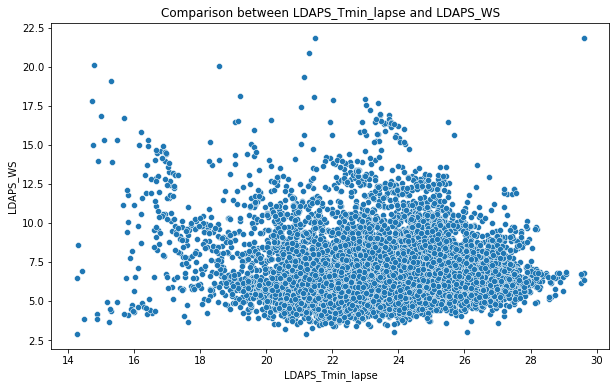

In [86]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_Tmin_lapse and LDAPS_WS')
sns.scatterplot(Temp_pred['LDAPS_Tmin_lapse'], Temp_pred['LDAPS_WS']);

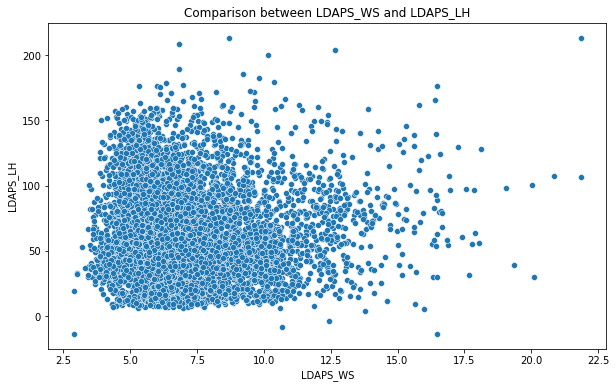

In [87]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_WS and LDAPS_LH')
sns.scatterplot(Temp_pred['LDAPS_WS'], Temp_pred['LDAPS_LH']);

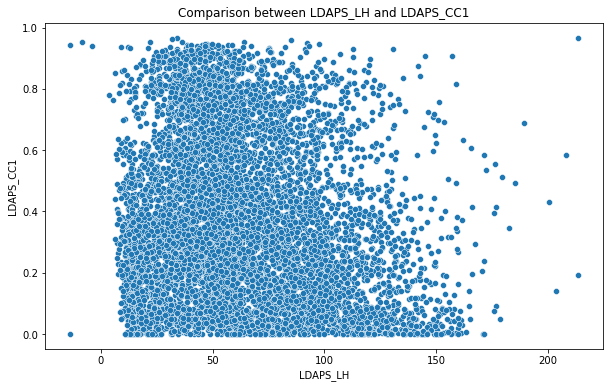

In [88]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_LH and LDAPS_CC1')
sns.scatterplot(Temp_pred['LDAPS_LH'], Temp_pred['LDAPS_CC1']);

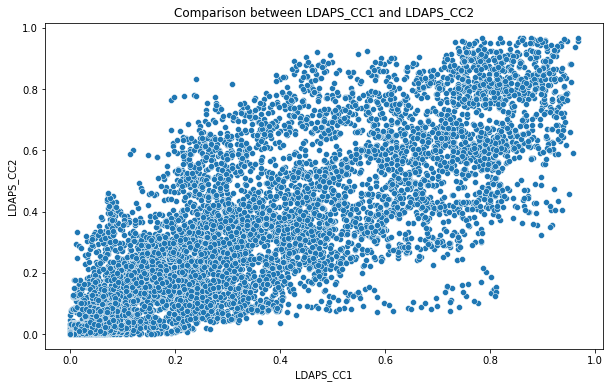

In [89]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_CC1 and LDAPS_CC2')
sns.scatterplot(Temp_pred['LDAPS_CC1'], Temp_pred['LDAPS_CC2']);

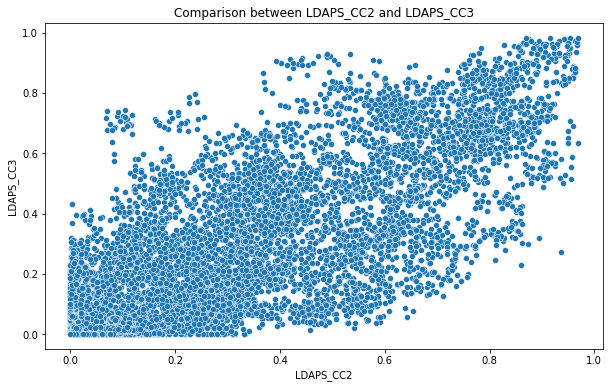

In [90]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_CC2 and LDAPS_CC3')
sns.scatterplot(Temp_pred['LDAPS_CC2'], Temp_pred['LDAPS_CC3']);

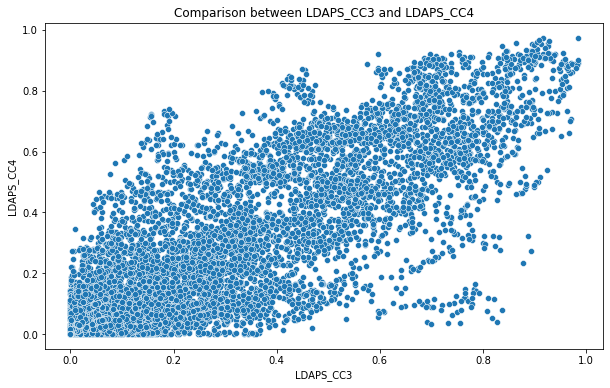

In [91]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_CC3 and LDAPS_CC4')
sns.scatterplot(Temp_pred['LDAPS_CC3'], Temp_pred['LDAPS_CC4']);

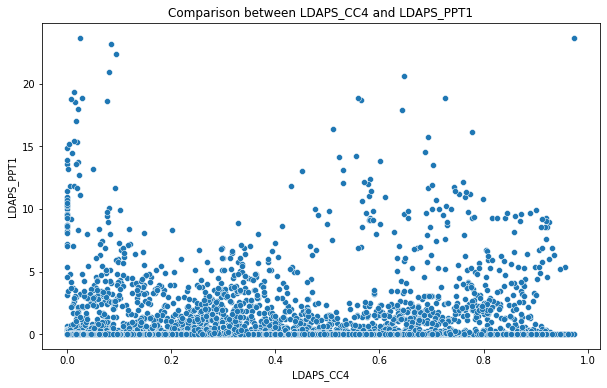

In [92]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_CC4 and LDAPS_PPT1')
sns.scatterplot(Temp_pred['LDAPS_CC4'], Temp_pred['LDAPS_PPT1']);

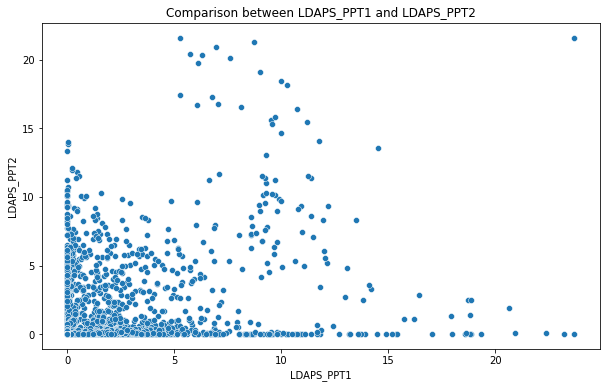

In [93]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_PPT1 and LDAPS_PPT2')
sns.scatterplot(Temp_pred['LDAPS_PPT1'], Temp_pred['LDAPS_PPT2']);

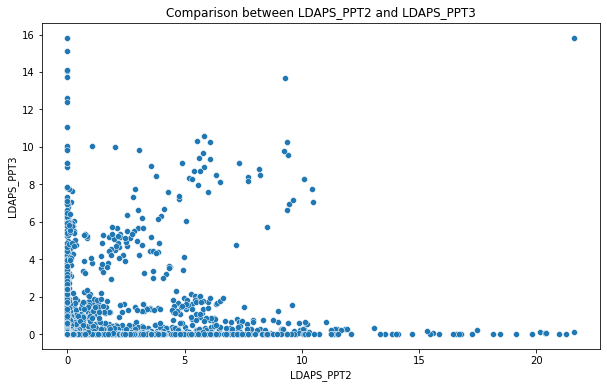

In [94]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_PPT2 and LDAPS_PPT3')
sns.scatterplot(Temp_pred['LDAPS_PPT2'], Temp_pred['LDAPS_PPT3']);

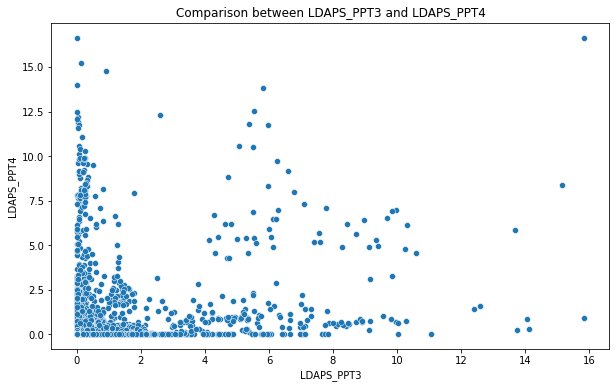

In [95]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_PPT3 and LDAPS_PPT4')
sns.scatterplot(Temp_pred['LDAPS_PPT3'], Temp_pred['LDAPS_PPT4']);

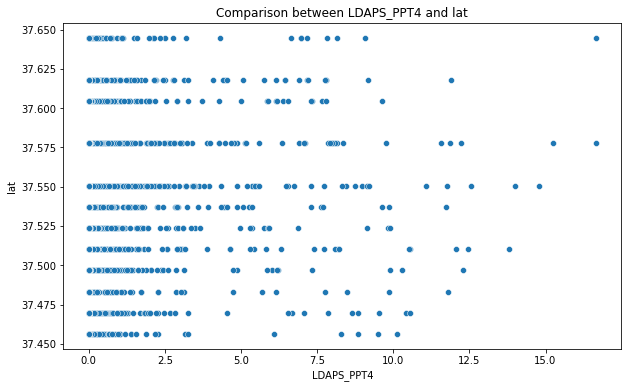

In [96]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LDAPS_PPT4 and lat')
sns.scatterplot(Temp_pred['LDAPS_PPT4'], Temp_pred['lat']);

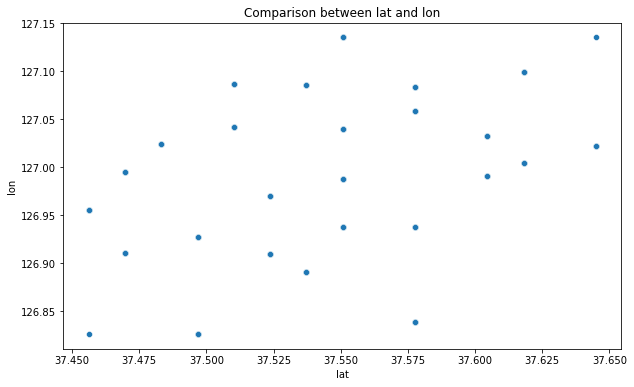

In [97]:
plt.figure(figsize=[10,6])
plt.title('Comparison between lat and lon')
sns.scatterplot(Temp_pred['lat'], Temp_pred['lon']);

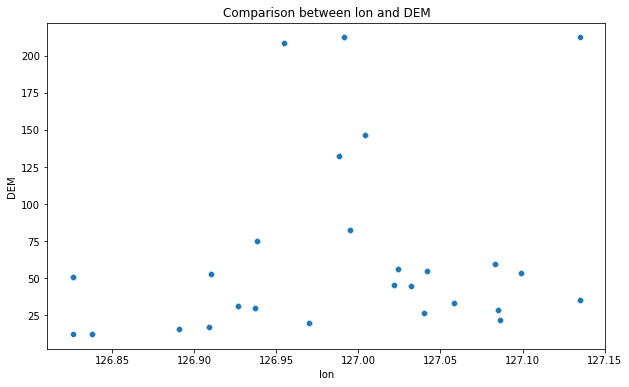

In [98]:
plt.figure(figsize=[10,6])
plt.title('Comparison between lon and DEM')
sns.scatterplot(Temp_pred['lon'], Temp_pred['DEM']);

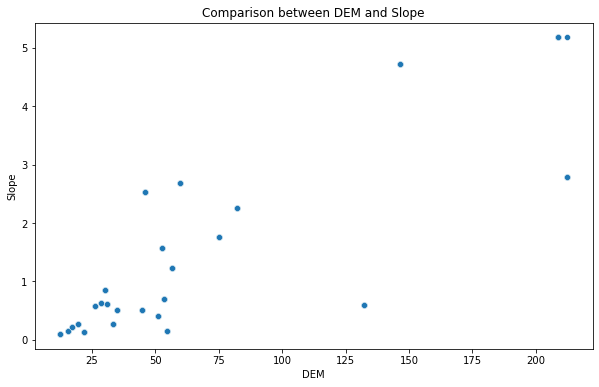

In [99]:
plt.figure(figsize=[10,6])
plt.title('Comparison between DEM and Slope')
sns.scatterplot(Temp_pred['DEM'], Temp_pred['Slope']);

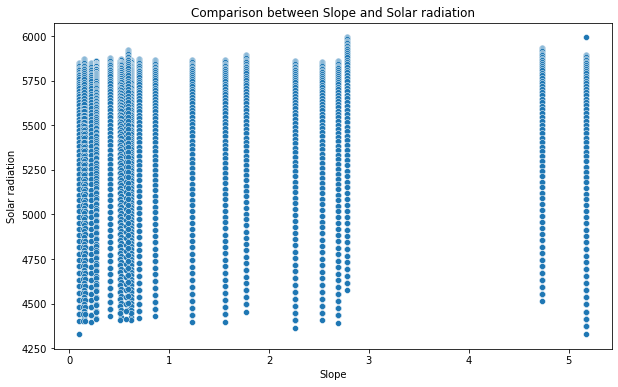

In [100]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Slope and Solar radiation')
sns.scatterplot(Temp_pred['Slope'], Temp_pred['Solar radiation']);

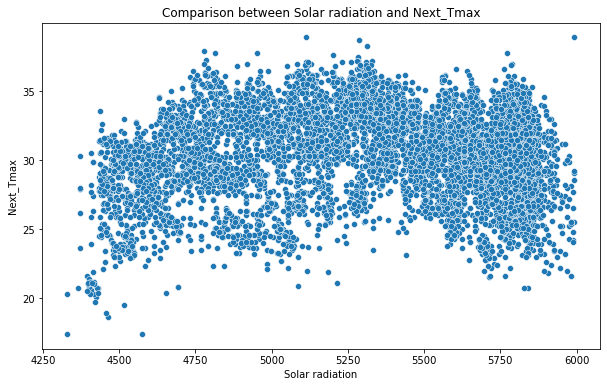

In [101]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Solar radiation and Next_Tmax')
sns.scatterplot(Temp_pred['Solar radiation'], Temp_pred['Next_Tmax']);

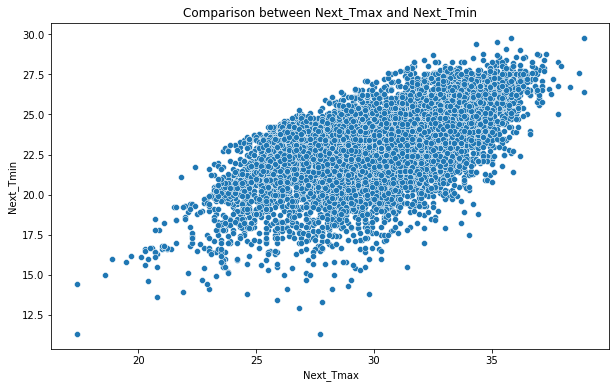

In [102]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Next_Tmax and Next_Tmin')
sns.scatterplot(Temp_pred['Next_Tmax'], Temp_pred['Next_Tmin']);

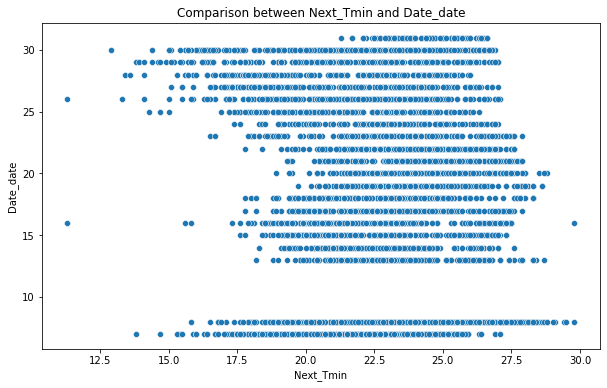

In [103]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Next_Tmin and Date_date')
sns.scatterplot(Temp_pred['Next_Tmin'], Temp_pred['Date_date']);

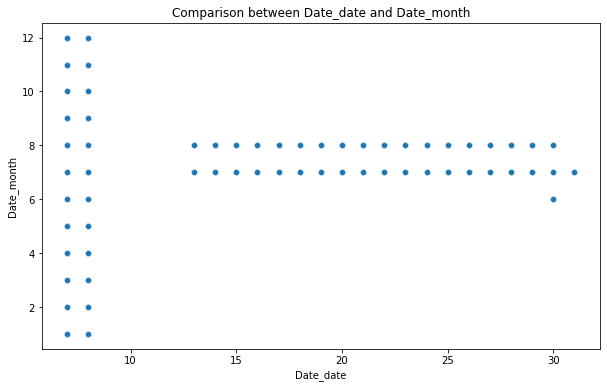

In [104]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Date_date and Date_month')
sns.scatterplot(Temp_pred['Date_date'], Temp_pred['Date_month']);

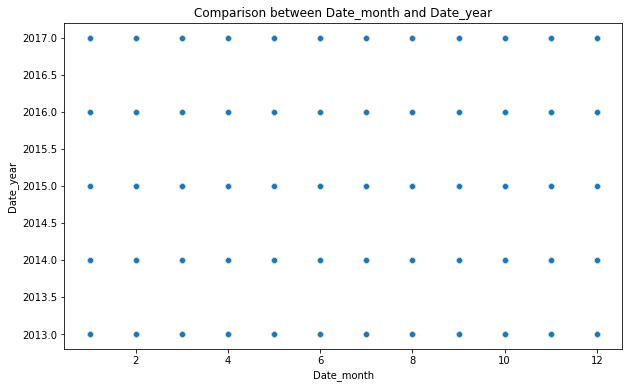

In [105]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Date_month and Date_year')
sns.scatterplot(Temp_pred['Date_month'], Temp_pred['Date_year']);

From the scatterplots we can say that, some correlation can be seen in the Present_Tmax and Present_Tmin, LDAPS_RHmin and LDAPS_RHmax, LDAPS_Tmax_lapse and LDAPS_Tmin_lapse, LDAPS_CC1 and LDAPS_CC2,LDAPS_CC2 and LDAPS_CC3, LDAPS_CC3 and LDAPS_CC4,Next_Tmax and Next_Tmin   

In [106]:
Temp_pred.describe(percentiles=[0.20,0.25,0.40,0.50,0.60,0.75,0.80])

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_date,Date_month,Date_year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.370872,7.080624,2015.000000
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,8.240270,2.238075,1.414122
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
20%,6.000000,27.200000,21.200000,43.971689,82.513168,27.151188,21.617027,5.474573,33.264169,0.112254,...,37.496700,126.913400,22.833040,0.231060,4893.512695,27.600000,20.900000,8.000000,6.000000,2014.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
40%,11.000000,29.140000,22.800000,51.563257,88.115988,28.955074,23.194818,6.201123,49.518082,0.253308,...,37.529100,126.977200,33.999280,0.537300,5278.537305,29.600000,22.500000,13.000000,7.000000,2015.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
60%,15.000000,30.700000,23.900000,58.886602,91.452071,30.449243,24.267643,7.045469,65.833330,0.397767,...,37.550700,127.023200,53.089920,0.791920,5569.096582,31.300000,23.700000,19.000000,8.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000


Mean is higher than median in LDAPS_LH,LDAPS_CC1,DEM so the data is positively skewed in these columns.

Small gap can be found between 75 percentile and max in station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,Next_Tmax,Next_Tmin,Date_date,Date_month
so some outliers are present in these columns.

Large gap can be found between 75 percentile and max in LDAPS_WS,LDAPS_LH,DEM,Slope so large amount of outliers are present in them.

### multivariate analysis

In [107]:
#sns.pairplot(Temp_pred)  

In [108]:
cor=Temp_pred.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_date,Date_month,Date_year
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,...,-0.237502,-0.118704,-2.558297e-01,-9.006090e-02,-0.019001,0.107983,0.128293,1.721796e-17,2.186980e-17,0.000000e+00
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-0.052615,0.009020,-1.871206e-01,-1.058092e-01,-0.025439,0.610348,0.622741,-1.438031e-01,-1.147705e-03,5.980007e-02
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,-0.078475,-0.043461,-2.502747e-01,-1.463390e-01,0.053578,0.471806,0.796670,-1.082594e-01,-3.424069e-03,3.739568e-02
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.087099,-0.076237,1.021149e-01,1.237439e-01,0.244080,-0.437898,0.095019,-6.583900e-02,-5.394173e-02,-2.044507e-03
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.195798,0.025667,1.771681e-01,2.195989e-01,0.149261,-0.283738,-0.071997,-1.299238e-02,-3.997828e-02,-1.418320e-01
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.042093,0.090666,-1.788954e-01,-1.623324e-01,0.047971,0.827189,0.586868,-1.603153e-01,-2.168507e-02,1.617217e-02
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,-0.096257,-0.026701,-1.954553e-01,-1.858487e-01,0.159975,0.586983,0.880176,-1.779467e-01,-2.748957e-02,-4.693413e-03
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.036657,-0.059466,1.910530e-01,1.716286e-01,0.121759,-0.342729,-0.096576,-2.916284e-02,-8.131024e-02,-1.113577e-01
LDAPS_LH,-1.333566e-01,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,0.133221,0.025822,5.513344e-02,8.678088e-02,-0.047384,0.157616,-0.055440,-1.210779e-02,-2.275811e-02,5.707733e-02
LDAPS_CC1,6.918787e-03,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,-0.008131,-0.006843,-1.409033e-02,-2.075199e-02,0.218309,-0.452541,-0.011028,-2.014227e-02,-7.627597e-02,-6.647797e-02


<AxesSubplot:>

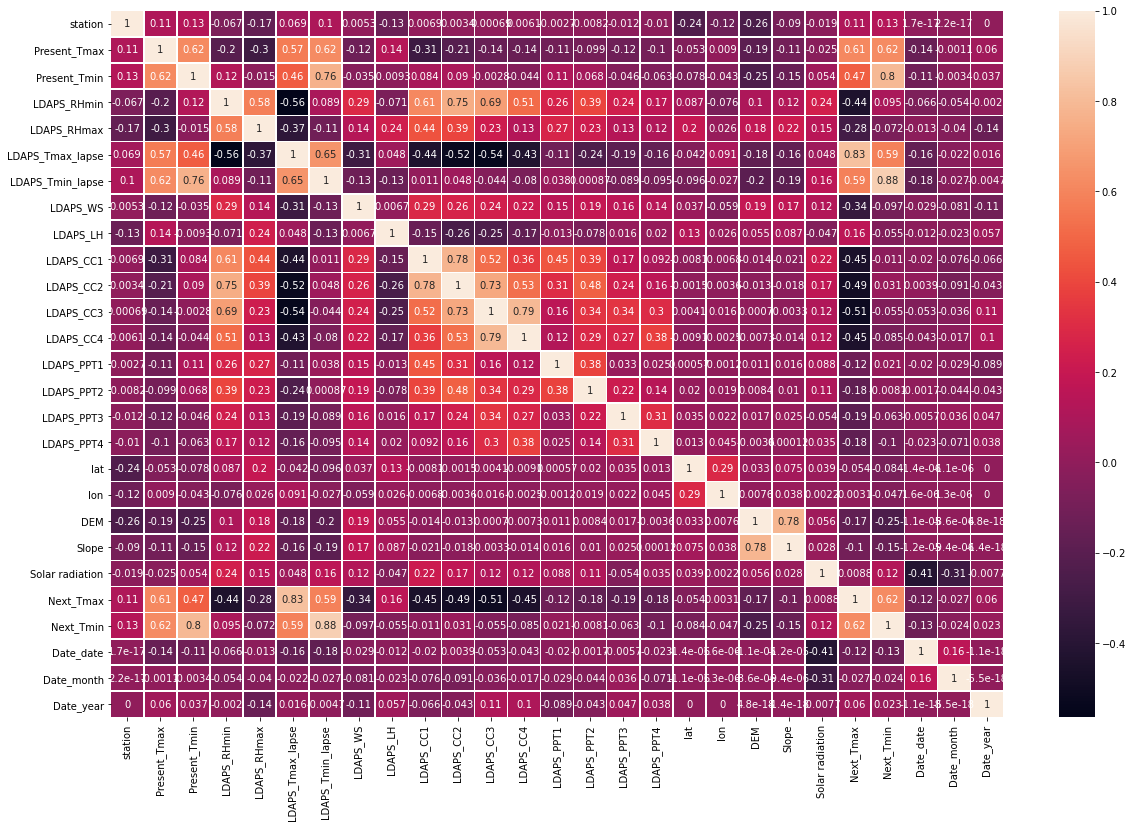

In [109]:
import matplotlib.pyplot as plt  # Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,13))        
sns.heatmap(cor, annot=True, linewidths=.5, ax=ax)

From the correlation heatmap:

Positive correlation can be found between columns:

Present_Tmax and Next_Tmin with value=0.62

Present_Tmax and Next_Tmax with value=0.61

Present_Tmax and LDAPS_Tmin_lapse with value=0.62

Present_Tmax and LDAPS_Tmax_lapse with value=0.57

Present_Tmax and Present_Tmin with value=0.62

Present_Tmin and Next_Tmin with value=0.80

Present_Tmin and LDAPS_Tmin_lapse with value=0.76

Present_Tmin and Present_Tmax with value=0.62

LDAPS_RHmin and LDAPS_CC4 with value=0.51

LDAPS_RHmin and LDAPS_CC3 with value=0.69

LDAPS_RHmin and LDAPS_CC2 with value=0.75

LDAPS_RHmin and LDAPS_CC1 with value=0.61

LDAPS_RHmin and LDAPS_RHmax with value=0.58

LDAPS_Tmax_lapse and Next_Tmin with value=0.59

LDAPS_Tmax_lapse and Next_Tmax with value=0.83

LDAPS_Tmax_lapse and LDAPS_Tmin_lapse with value=0.65

LDAPS_Tmax_lapse and Present_Tmax with value=0.57

LDAPS_Tmin_lapse and Next_Tmin with value =0.88

LDAPS_Tmin_lapse and Next_Tmax with value =0.59

LDAPS_CC1 and LDAPS_CC3 with value=0.52

LDAPS_CC1 and LDAPS_CC2 with value=0.78

LDAPS_CC2 and LDAPS_CC4 with value=0.53

LDAPS_CC2 and LDAPS_CC3 with value=0.73

LDAPS_CC2 and LDAPS_CC1 with value=0.78

LDAPS_CC3 and LDAPS_CC4 with value=0.79

DEM and Slope with value =0.78

Next_Tmax and Next_Tmin with value = 0.62


The columns with negative value of correlation are:
    
LDAPS_RHmin and LDAPS_Tmax_lapse with value=-0.56

LDAPS_Tmax_lapse and LDAPS_CC3 with value=-0.54

LDAPS_Tmax_lapse and LDAPS_CC2 with value=-0.52

LDAPS_Tmax_lapse and LDAPS_CC2 with value=-0.52

LDAPS_CC3 and Next_Tmax with value=-0.51

LDAPS_CC3 and LDAPS_Tmax_lapse with value=-0.54

Next_Tmax and LDAPS_CC3 with value = -0.51









## Considering the outlier removal

In [110]:
#removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(Temp_pred))
z

array([[1.6643153 , 0.36132577, 0.75952931, ..., 1.65407295, 0.48286762,
        1.41439603],
       [1.52562236, 0.72108401, 0.6762959 , ..., 1.65407295, 0.48286762,
        1.41439603],
       [1.38692941, 0.61960809, 0.03118815, ..., 1.65407295, 0.48286762,
        1.41439603],
       ...,
       [1.6643153 , 2.22171758, 2.42419767, ..., 1.65407295, 0.41081503,
        1.41439603],
       [0.        , 3.30412736, 4.9628169 , ..., 0.04501017, 0.03602629,
        0.        ],
       [0.        , 2.64912642, 2.77789093, ..., 0.04501017, 0.03602629,
        0.        ]])

In [111]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [112]:
Temp_pred_new=Temp_pred[(z<3).all(axis=1)]

In [113]:
Temp_pred_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_date,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [114]:
Temp_pred

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_date,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30,8,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30,8,2017
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,16,7,2015


In [115]:
7752-6894

858

In [116]:
858/7752

0.11068111455108359

Here the data loss after outlier removal is more than 5 percent, so we will take the original dataframe.

## Skewness Checking and Removal

In [117]:
Temp_pred.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Date_date           0.245548
Date_month         -0.705303
Date_year           0.000000
dtype: float64

Columns having positive skewness are:
    
LDAPS_WS with value=1.579236

LDAPS_LH with value=0.673757

LDAPS_CC3 with value=0.640735

LDAPS_CC4 with value=0.666482

LDAPS_PPT1  with value=5.393821

LDAPS_PPT2  with value=5.775355

LDAPS_PPT3  with value=6.457129

LDAPS_PPT4 with value=6.825464

DEM with value=1.723257

Slope with value=1.563020

Columns having negative skewness are:
    
LDAPS_RHmax with value=-0.855015

LDAPS_Tmin_lapse with value=-0.581763

Solar radiation with value=-0.511210

Date_month with value=-0.705303



In [118]:
xnew=Temp_pred.drop(['Next_Tmax','Next_Tmin'], axis=1)
ynew=Temp_pred[['Next_Tmax','Next_Tmin']]

In [119]:
from sklearn.preprocessing import power_transform
x_new=power_transform(xnew, method='yeo-johnson')
x_new

array([[-1.86035552e+00, -4.08897262e-01, -7.97706579e-01, ...,
         1.41894740e+00, -5.82383160e-01, -1.41449849e+00],
       [-1.64838475e+00,  7.05122710e-01, -7.20130385e-01, ...,
         1.41894740e+00, -5.82383160e-01, -1.41449849e+00],
       [-1.45484830e+00,  5.95692407e-01, -2.76742340e-02, ...,
         1.41894740e+00, -5.82383160e-01, -1.41449849e+00],
       ...,
       [ 1.54118849e+00, -2.04992031e+00, -2.18006638e+00, ...,
         1.41894740e+00,  3.64033610e-01,  1.41429358e+00],
       [ 7.70875044e-02, -2.84618687e+00, -3.68800537e+00, ...,
         1.63782406e-01, -1.25894104e-01,  1.02404287e-04],
       [ 7.70875044e-02,  2.98103740e+00,  3.23307848e+00, ...,
         1.63782406e-01, -1.25894104e-01,  1.02404287e-04]])

In [120]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_scaled=SC.fit_transform(x_new)
x_scaled

array([[-1.86035552e+00, -4.08897262e-01, -7.97706579e-01, ...,
         1.41894740e+00, -5.82383160e-01, -1.41449849e+00],
       [-1.64838475e+00,  7.05122710e-01, -7.20130385e-01, ...,
         1.41894740e+00, -5.82383160e-01, -1.41449849e+00],
       [-1.45484830e+00,  5.95692407e-01, -2.76742340e-02, ...,
         1.41894740e+00, -5.82383160e-01, -1.41449849e+00],
       ...,
       [ 1.54118849e+00, -2.04992031e+00, -2.18006638e+00, ...,
         1.41894740e+00,  3.64033610e-01,  1.41429358e+00],
       [ 7.70875044e-02, -2.84618687e+00, -3.68800537e+00, ...,
         1.63782406e-01, -1.25894104e-01,  1.02404287e-04],
       [ 7.70875044e-02,  2.98103740e+00,  3.23307848e+00, ...,
         1.63782406e-01, -1.25894104e-01,  1.02404287e-04]])

In [121]:
xscaled=pd.DataFrame(x_scaled)
xscaled

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.860356,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,-0.412176,...,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,1.418947,-0.582383,-1.414498
1,-1.648385,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,-0.451258,...,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,1.418947,-0.582383,-1.414498
2,-1.454848,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,-0.527382,...,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,1.418947,-0.582383,-1.414498
3,-1.273958,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,-0.494077,...,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,1.418947,-0.582383,-1.414498
4,-1.102545,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,-0.814752,...,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,1.418947,-0.582383,-1.414498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.312469,-2.023162,-2.270927,-2.395892,-1.326845,-1.111724,-1.831134,-0.307886,0.383363,-1.502656,...,-0.505596,-0.458389,0.0,-1.257759,-1.578128,-1.280447,-1.754608,1.418947,0.364034,1.414294
7748,1.427440,-2.023162,-2.087438,-2.681557,-1.470235,-0.902733,-1.843546,-0.063701,-0.363041,-1.466503,...,-0.505596,-0.458389,0.0,-1.041466,-1.400633,-1.072947,-1.760631,1.418947,0.364034,1.414294
7749,1.541188,-2.049920,-2.180066,-2.803707,-1.474702,-0.600985,-1.904782,0.337939,-1.973052,-1.386744,...,-0.505596,-0.458389,0.0,-0.291792,-1.193124,-0.935044,-1.744763,1.418947,0.364034,1.414294
7750,0.077088,-2.846187,-3.688005,-3.168120,-2.459357,-3.504186,-2.891504,-4.119648,-7.414001,-1.694130,...,-0.505596,-0.458389,0.0,-2.020630,-1.985144,-1.477264,-1.887071,0.163782,-0.125894,0.000102


In [122]:
xscaled.rename(columns = {0:'station', 1:'Present_Tmax',
                              2:'Present_Tmin',3:'LDAPS_RHmin',4:'LDAPS_RHmax',5:'LDAPS_Tmax_lapse',6:'LDAPS_Tmin_lapse',7:'LDAPS_WS',8:'LDAPS_LH',9:'LDAPS_CC1',10:'LDAPS_CC2',11:'LDAPS_CC3',12:'LDAPS_CC4',13:'LDAPS_PPT1',14:'LDAPS_PPT2',15:'LDAPS_PPT3',16:'LDAPS_PPT4',17:'lat',18:'lon',19:'DEM',20:'Slope',21:'Solar radiation',22:'Date_date',23:'Date_month',24:'Date_year'}, inplace = True)
xscaled

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Date_date,Date_month,Date_year
0,-1.860356,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,-0.412176,...,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,1.418947,-0.582383,-1.414498
1,-1.648385,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,-0.451258,...,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,1.418947,-0.582383,-1.414498
2,-1.454848,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,-0.527382,...,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,1.418947,-0.582383,-1.414498
3,-1.273958,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,-0.494077,...,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,1.418947,-0.582383,-1.414498
4,-1.102545,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,-0.814752,...,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,1.418947,-0.582383,-1.414498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.312469,-2.023162,-2.270927,-2.395892,-1.326845,-1.111724,-1.831134,-0.307886,0.383363,-1.502656,...,-0.505596,-0.458389,0.0,-1.257759,-1.578128,-1.280447,-1.754608,1.418947,0.364034,1.414294
7748,1.427440,-2.023162,-2.087438,-2.681557,-1.470235,-0.902733,-1.843546,-0.063701,-0.363041,-1.466503,...,-0.505596,-0.458389,0.0,-1.041466,-1.400633,-1.072947,-1.760631,1.418947,0.364034,1.414294
7749,1.541188,-2.049920,-2.180066,-2.803707,-1.474702,-0.600985,-1.904782,0.337939,-1.973052,-1.386744,...,-0.505596,-0.458389,0.0,-0.291792,-1.193124,-0.935044,-1.744763,1.418947,0.364034,1.414294
7750,0.077088,-2.846187,-3.688005,-3.168120,-2.459357,-3.504186,-2.891504,-4.119648,-7.414001,-1.694130,...,-0.505596,-0.458389,0.0,-2.020630,-1.985144,-1.477264,-1.887071,0.163782,-0.125894,0.000102


### VIF for checking and removing multicollinearity problem

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
def calculate_vif(a):
    vif=pd.DataFrame()
    vif["variables"]=a.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
    return(vif)

In [125]:
calculate_vif(xscaled)

,variables,VIF FACTOR
0,station,1.210124
1,Present_Tmax,2.901724
2,Present_Tmin,3.109584
3,LDAPS_RHmin,6.072492
4,LDAPS_RHmax,2.541789
5,LDAPS_Tmax_lapse,7.044721
6,LDAPS_Tmin_lapse,7.076131
7,LDAPS_WS,1.257384
8,LDAPS_LH,1.515580
9,LDAPS_CC1,4.667317


In [126]:
xscaled=xscaled.drop(['LDAPS_RHmin','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'], axis=1)
xscaled

,station,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Date_date,Date_month,Date_year
0,-1.860356,-0.408897,-0.797707,0.272915,0.093387,0.310382,-0.412176,-0.506509,-0.541852,-0.584801,...,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,1.418947,-0.582383,-1.414498
1,-1.648385,0.705123,-0.720130,0.185831,-0.625565,-0.211695,-0.451258,-0.283702,-0.554289,-0.603593,...,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,1.418947,-0.582383,-1.414498
2,-1.454848,0.595692,-0.027674,-0.773454,-0.314874,-1.375126,-0.527382,-0.258127,-0.317480,-0.520112,...,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,1.418947,-0.582383,-1.414498
3,-1.273958,0.741829,0.014910,1.316777,-0.656732,0.204179,-0.494077,-0.401828,-0.544825,-0.565449,...,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,1.418947,-0.582383,-1.414498
4,-1.102545,0.523313,-0.602237,0.110968,-0.593836,1.300503,-0.814752,-0.291713,-0.448666,-0.365736,...,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,1.418947,-0.582383,-1.414498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.312469,-2.023162,-2.270927,-1.326845,-0.307886,0.383363,-1.502656,-1.152361,-1.595889,-1.480634,...,-0.505596,-0.458389,0.0,-1.257759,-1.578128,-1.280447,-1.754608,1.418947,0.364034,1.414294
7748,1.427440,-2.023162,-2.087438,-1.470235,-0.063701,-0.363041,-1.466503,-1.187449,-1.595889,-1.480634,...,-0.505596,-0.458389,0.0,-1.041466,-1.400633,-1.072947,-1.760631,1.418947,0.364034,1.414294
7749,1.541188,-2.049920,-2.180066,-1.474702,0.337939,-1.973052,-1.386744,-1.276108,-1.595889,-1.474280,...,-0.505596,-0.458389,0.0,-0.291792,-1.193124,-0.935044,-1.744763,1.418947,0.364034,1.414294
7750,0.077088,-2.846187,-3.688005,-2.459357,-4.119648,-7.414001,-1.694130,-1.649551,-1.595889,-1.480634,...,-0.505596,-0.458389,0.0,-2.020630,-1.985144,-1.477264,-1.887071,0.163782,-0.125894,0.000102


In [127]:
xtrain=xscaled
ytrain=ynew

## train_test_split

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [129]:
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    print("r2score at random state",i,"is",r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error :', mean_absolute_error(y_test,pred))
    print('Mean squared error :', mean_squared_error(y_test,pred))
    print('Root mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))
    

r2score at random state 0 is 0.7450698098597854
error:
Mean absolute error : 0.973477045923326
Mean squared error : 2.03858752663851
Root mean Squared Error : 1.4277911355091506
r2score at random state 1 is 0.7157582417434001
error:
Mean absolute error : 1.0095713586542043
Mean squared error : 2.2130261638766258
Root mean Squared Error : 1.4876243356024483
r2score at random state 2 is 0.7278610320955228
error:
Mean absolute error : 1.010410147066445
Mean squared error : 2.1469874693978928
Root mean Squared Error : 1.4652602053553125
r2score at random state 3 is 0.7438487538768969
error:
Mean absolute error : 0.993673395883047
Mean squared error : 2.041286624679302
Root mean Squared Error : 1.428736023441455
r2score at random state 4 is 0.7416938826868917
error:
Mean absolute error : 0.9752453640997998
Mean squared error : 2.099854943710862
Root mean Squared Error : 1.4490876245799844
r2score at random state 5 is 0.7329079856092959
error:
Mean absolute error : 0.9938911892919317
Mean sq

In [130]:
from sklearn.tree import DecisionTreeRegressor
maxr2=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxRS=i
print("Best accuracy is ", maxr2, "on Random_state", maxRS)

Best accuracy is  0.7718824074871353 on Random_state 160


In [131]:
x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=4)


### Now checking for r2_score 

In [132]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
knn=neigh.fit(xtrain, ytrain)
pred=knn.predict(x_test)
print(r2_score(y_test,pred))

0.9390057123030995


In [133]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth=2, random_state=0)
RFReg.fit(x_train, y_train)
pred=RFReg.predict(x_test)
print(r2_score(y_test,pred))

0.46441545692350844


In [134]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.7402160807801755


In [135]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)  #enr=ElasticNet()
enr.fit(x_train,y_train)
Enrpred=enr.predict(x_test)
print(enr.score(x_test,Enrpred))
enr.coef_

1.0


array([[ 0.12730104,  0.93198808,  0.94244973, -0.10167266, -0.4783427 ,
         0.01611552, -0.11183302, -0.50479825, -0.62702851, -0.36864702,
        -0.10810173, -0.07902324, -0.06177347,  0.20816568,  0.        ,
         0.04094093,  0.05464761, -0.04294653,  0.26125284, -0.04302471,
        -0.15290926,  0.06170714],
       [-0.01190705,  0.65704768,  1.53189059,  0.17689058,  0.01347956,
        -0.21483351,  0.17865534,  0.11490985, -0.02898804, -0.        ,
        -0.26022272, -0.17379984, -0.00917714, -0.11681595,  0.        ,
        -0.01841898, -0.16463088, -0.        ,  0.1999299 ,  0.04383935,
        -0.0092028 , -0.02885322]])

In [136]:
import numpy as np
from sklearn.linear_model import LinearRegression
REG = LinearRegression()
REG.fit(x_train, y_train)
pred=REG.predict(x_test)
print(r2_score(y_test,pred))

0.6659118547289298


### Now checking cross_validation_score

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
print(cross_val_score(neigh,xtrain,ytrain,cv=5).mean())

0.24585810538931163


In [139]:
print(cross_val_score(RFReg,xtrain,ytrain,cv=5).mean())

0.30243916260541703


In [140]:
print(cross_val_score(DTR,xtrain,ytrain,cv=5).mean())

0.08203446741203038


In [141]:
print(cross_val_score(enr,xtrain,ytrain,cv=5).mean())

0.5525052108703034


In [142]:
print(cross_val_score(REG,xtrain,ytrain,cv=5).mean())

0.5505804007380625


DecisionTreeRegressor can be used as the best model.

## Hyper parameter tuning

In [143]:
from sklearn.model_selection import RandomizedSearchCV

In [144]:
parameter = {'max_depth':np.arange(1,9),
            'min_samples_split':np.arange(3,7), 
            'min_samples_leaf':np.arange(3,8),
            'max_features' :np.arange(2,9)}

In [145]:
RCV=RandomizedSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [146]:
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'max_features': array([2, 3, 4, 5, 6, 7, 8]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6])})

In [147]:
RCV.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 5,
 'max_depth': 8}

In [148]:
Final_model= DecisionTreeRegressor(min_samples_split = 6, min_samples_leaf =3, max_features=8, max_depth=7)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score*100)

67.3370426437101


## Saving the Model

In [149]:
#from sklearn.externals import joblib
import joblib
# save the model as a object file
joblib.dump(Final_model,"Evaluation_10_Temperature_prediction.pkl")

['Evaluation_10_Temperature_prediction.pkl']

## Conclusion

In [150]:
Original=y_test
Original

,Next_Tmax,Next_Tmin
3959,30.3,24.2
7516,31.9,21.3
3546,27.0,20.9
5131,33.2,25.1
1341,29.4,22.2
...,...,...
1719,33.9,20.4
7520,31.3,23.8
1056,33.3,26.9
283,23.6,22.7


In [151]:
pred=pd.DataFrame(pred)
pred=pred.rename(columns = {0:'Next_Tmax', 1:'Next_Tmin'})
pred

,Next_Tmax,Next_Tmin
0,31.470646,24.194185
1,31.649998,23.180449
2,27.093827,20.787654
3,33.000000,23.191304
4,26.516667,23.183333
...,...,...
2554,30.915094,21.499057
2555,31.650407,23.130081
2556,34.200465,25.607032
2557,26.087291,22.377769
